# Part I - (Loan Data from Prosper)
## by (Victoria Edem Effiwatt)

## Introduction
> This data set from Prosper contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
 This [data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000) explains the variables in the data set.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load the dataset
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Picking only columns that I'll need for project

In [4]:
#slice dataframe to select only columns of interest
pld = df[['LoanStatus', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'EmploymentStatus', 'EmploymentStatusDuration', 'DebtToIncomeRatio', 'IsBorrowerHomeowner', 'Occupation', 'BorrowerState', 'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore', 'Term', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment', 'ListingCategory (numeric)']]

In [5]:
pld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanStatus                 113937 non-null  object 
 1   IncomeRange                113937 non-null  object 
 2   StatedMonthlyIncome        113937 non-null  float64
 3   LoanOriginalAmount         113937 non-null  int64  
 4   EmploymentStatus           111682 non-null  object 
 5   EmploymentStatusDuration   106312 non-null  float64
 6   DebtToIncomeRatio          105383 non-null  float64
 7   IsBorrowerHomeowner        113937 non-null  bool   
 8   Occupation                 110349 non-null  object 
 9   BorrowerState              108422 non-null  object 
 10  BorrowerRate               113937 non-null  float64
 11  ProsperRating (Alpha)      84853 non-null   object 
 12  ProsperScore               84853 non-null   float64
 13  Term                       11

In [6]:
#make a copy of dataset
pld = pld.copy()

In [7]:
#pld = pld[pld['EmploymentStatus'].notnull()]

In [8]:
#Filter to get only rows where EmploymentStatusDuration is not null
pld = pld[pld['EmploymentStatusDuration'].notnull()]

In [9]:
#Filter to get only rows where DebtToIncomeRatio is not null
pld = pld[pld['DebtToIncomeRatio'].notnull()]

In [10]:
#Filter to get only rows where ProsperRating is not null
pld = pld[pld['ProsperRating (Alpha)'].notnull()]

In [11]:
pld.head()

,LoanStatus,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,Occupation,BorrowerState,BorrowerRate,ProsperRating (Alpha),ProsperScore,Term,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,ListingCategory (numeric)
1,Current,"$50,000-74,999",6125.000000,10000,Employed,44.0,0.18,False,Professional,CO,0.0920,A,7.0,36,2014-03-03 00:00:00,Q1 2014,318.93,2
3,Current,"$25,000-49,999",2875.000000,10000,Employed,113.0,0.15,True,Skilled Labor,GA,0.0974,A,9.0,36,2012-11-01 00:00:00,Q4 2012,321.45,16
4,Current,"$100,000+",9583.333333,15000,Employed,44.0,0.26,True,Executive,MN,0.2085,D,4.0,36,2013-09-20 00:00:00,Q3 2013,563.97,2
5,Current,"$100,000+",8333.333333,15000,Employed,82.0,0.36,True,Professional,NM,0.1314,B,10.0,60,2013-12-24 00:00:00,Q4 2013,342.37,1
6,Current,"$25,000-49,999",2083.333333,3000,Employed,172.0,0.27,False,Sales - Retail,KS,0.2712,E,2.0,36,2013-04-18 00:00:00,Q2 2013,122.67,1


In [12]:
#Fill missing values in Occupation column with Not available
pld.Occupation = pld.Occupation.fillna('Not available')

In [13]:
from datetime import datetime
pld.LoanOriginationDate = pd.to_datetime(pld.LoanOriginationDate)

In [14]:
pld['LoanOriginationYear'] = pld['LoanOriginationDate'].dt.year
pld['LoanOriginationMonth'] = pld['LoanOriginationDate'].dt.month

In [15]:
#Drop LoanOriginationDateColumn
pld = pld.drop(['LoanOriginationDate'], axis=1)

In [16]:
#Replace numbers in LoanOriginationMonth with text equivalent
pld['LoanOriginationMonth'] = pld['LoanOriginationMonth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
        ['January','Febuary', 'March','April','May','June','July','August','September','October','November','December'])

In [17]:
#Replace numbers in ListingCategory (numeric) with text equivalent
pld['ListingCategory (numeric)'] = pld['ListingCategory (numeric)'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
        ['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV','Taxes','Vacation','Wedding Loans'])

In [18]:
pld.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

In [19]:
#split LoanOriginationQuarter to include specific quarter only
pld['LoanOriginationQuarter'] = pld.LoanOriginationQuarter.str.split(" ").str[0]

In [20]:
pld.head(4)

,LoanStatus,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,Occupation,BorrowerState,BorrowerRate,ProsperRating (Alpha),ProsperScore,Term,LoanOriginationQuarter,MonthlyLoanPayment,ListingCategory,LoanOriginationYear,LoanOriginationMonth
1,Current,"$50,000-74,999",6125.000000,10000,Employed,44.0,0.18,False,Professional,CO,0.0920,A,7.0,36,Q1,318.93,Home Improvement,2014,March
3,Current,"$25,000-49,999",2875.000000,10000,Employed,113.0,0.15,True,Skilled Labor,GA,0.0974,A,9.0,36,Q4,321.45,Motorcycle,2012,November
4,Current,"$100,000+",9583.333333,15000,Employed,44.0,0.26,True,Executive,MN,0.2085,D,4.0,36,Q3,563.97,Home Improvement,2013,September
5,Current,"$100,000+",8333.333333,15000,Employed,82.0,0.36,True,Professional,NM,0.1314,B,10.0,60,Q4,342.37,Debt Consolidation,2013,December


In [21]:
pld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LoanStatus                77543 non-null  object 
 1   IncomeRange               77543 non-null  object 
 2   StatedMonthlyIncome       77543 non-null  float64
 3   LoanOriginalAmount        77543 non-null  int64  
 4   EmploymentStatus          77543 non-null  object 
 5   EmploymentStatusDuration  77543 non-null  float64
 6   DebtToIncomeRatio         77543 non-null  float64
 7   IsBorrowerHomeowner       77543 non-null  bool   
 8   Occupation                77543 non-null  object 
 9   BorrowerState             77543 non-null  object 
 10  BorrowerRate              77543 non-null  float64
 11  ProsperRating (Alpha)     77543 non-null  object 
 12  ProsperScore              77543 non-null  float64
 13  Term                      77543 non-null  int64  
 14  LoanO

In [22]:
pld.head()

,LoanStatus,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,Occupation,BorrowerState,BorrowerRate,ProsperRating (Alpha),ProsperScore,Term,LoanOriginationQuarter,MonthlyLoanPayment,ListingCategory,LoanOriginationYear,LoanOriginationMonth
1,Current,"$50,000-74,999",6125.000000,10000,Employed,44.0,0.18,False,Professional,CO,0.0920,A,7.0,36,Q1,318.93,Home Improvement,2014,March
3,Current,"$25,000-49,999",2875.000000,10000,Employed,113.0,0.15,True,Skilled Labor,GA,0.0974,A,9.0,36,Q4,321.45,Motorcycle,2012,November
4,Current,"$100,000+",9583.333333,15000,Employed,44.0,0.26,True,Executive,MN,0.2085,D,4.0,36,Q3,563.97,Home Improvement,2013,September
5,Current,"$100,000+",8333.333333,15000,Employed,82.0,0.36,True,Professional,NM,0.1314,B,10.0,60,Q4,342.37,Debt Consolidation,2013,December
6,Current,"$25,000-49,999",2083.333333,3000,Employed,172.0,0.27,False,Sales - Retail,KS,0.2712,E,2.0,36,Q2,122.67,Debt Consolidation,2013,April


In [23]:
#Replace boolean by string
pld['IsBorrowerHomeowner'] = pld['IsBorrowerHomeowner'].map({True: 'True', False: 'False'}) 
pld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LoanStatus                77543 non-null  object 
 1   IncomeRange               77543 non-null  object 
 2   StatedMonthlyIncome       77543 non-null  float64
 3   LoanOriginalAmount        77543 non-null  int64  
 4   EmploymentStatus          77543 non-null  object 
 5   EmploymentStatusDuration  77543 non-null  float64
 6   DebtToIncomeRatio         77543 non-null  float64
 7   IsBorrowerHomeowner       77543 non-null  object 
 8   Occupation                77543 non-null  object 
 9   BorrowerState             77543 non-null  object 
 10  BorrowerRate              77543 non-null  float64
 11  ProsperRating (Alpha)     77543 non-null  object 
 12  ProsperScore              77543 non-null  float64
 13  Term                      77543 non-null  int64  
 14  LoanO

In [24]:
#Replace True with Home Owner and False, with Not Home Owner
pld.IsBorrowerHomeowner.replace('True', 'Home Owner', inplace=True)
pld.IsBorrowerHomeowner.replace('False', 'Not Home Owner', inplace=True)

In [25]:
pld.head()

,LoanStatus,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,Occupation,BorrowerState,BorrowerRate,ProsperRating (Alpha),ProsperScore,Term,LoanOriginationQuarter,MonthlyLoanPayment,ListingCategory,LoanOriginationYear,LoanOriginationMonth
1,Current,"$50,000-74,999",6125.000000,10000,Employed,44.0,0.18,Not Home Owner,Professional,CO,0.0920,A,7.0,36,Q1,318.93,Home Improvement,2014,March
3,Current,"$25,000-49,999",2875.000000,10000,Employed,113.0,0.15,Home Owner,Skilled Labor,GA,0.0974,A,9.0,36,Q4,321.45,Motorcycle,2012,November
4,Current,"$100,000+",9583.333333,15000,Employed,44.0,0.26,Home Owner,Executive,MN,0.2085,D,4.0,36,Q3,563.97,Home Improvement,2013,September
5,Current,"$100,000+",8333.333333,15000,Employed,82.0,0.36,Home Owner,Professional,NM,0.1314,B,10.0,60,Q4,342.37,Debt Consolidation,2013,December
6,Current,"$25,000-49,999",2083.333333,3000,Employed,172.0,0.27,Not Home Owner,Sales - Retail,KS,0.2712,E,2.0,36,Q2,122.67,Debt Consolidation,2013,April


In [26]:
#Round StatedMonthlyIncome to 2 dp ()
pld.StatedMonthlyIncome = pld.StatedMonthlyIncome.round(decimals=0)

In [27]:
#Convert LoanStatus, ProsperRating (Alpha), ProsperScore into ordered categorical types
var_dict = {'LoanStatus': ['Cancelled',  'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress',
                                   'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                    'EmploymentStatus': ['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other', 'Part-time', 'Not employed', 'Retired'],
                   'LoanOriginationMonth': ['January','Febuary', 'March','April','May','June','July','August','September','October','November','December'],
                   'LoanOriginationYear' : [2009, 2010, 2011, 2012, 2013, 2014],
                   'LoanOriginationQuarter' : ['Q1', 'Q2', 'Q3', 'Q4'],
                   'IncomeRange' : ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999','$100,000+']}

for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=var_dict[var])
    pld[var] = pld[var].astype(ordered_var)

In [28]:
#convert to right datatype
pld.IsBorrowerHomeowner = pld.IsBorrowerHomeowner.astype('category')

In [29]:
pld['ListingCategory'] = pld['ListingCategory'].astype('category')

In [30]:
pld.EmploymentStatus = pld.EmploymentStatus.astype('category')

In [31]:
pld["LoanStatus"] = pld["LoanStatus"].cat.set_categories(['Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress',
                                   'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'], ordered=True)

In [32]:
pld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   LoanStatus                77543 non-null  category
 1   IncomeRange               77543 non-null  category
 2   StatedMonthlyIncome       77543 non-null  float64 
 3   LoanOriginalAmount        77543 non-null  int64   
 4   EmploymentStatus          77543 non-null  category
 5   EmploymentStatusDuration  77543 non-null  float64 
 6   DebtToIncomeRatio         77543 non-null  float64 
 7   IsBorrowerHomeowner       77543 non-null  category
 8   Occupation                77543 non-null  object  
 9   BorrowerState             77543 non-null  object  
 10  BorrowerRate              77543 non-null  float64 
 11  ProsperRating (Alpha)     77543 non-null  category
 12  ProsperScore              77543 non-null  category
 13  Term                      77543 non-null  int

In [33]:
#Save to a csv file
pld.to_csv('ProsperLoanDataClean.csv', index=False)

### What is the structure of your dataset?

> There are 77,543 loan listings and 19 variables in the dataset.
> Some variables are numerical, others categorical.

### What is/are the main feature(s) of interest in your dataset?

> LoanOriginalAmount, LoanStatus

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> IncomeRange, Occupation, IsBorrowerHomeowner,  LoanOriginationYear, EmploymentStatus, ProsperScore, StatedMonthlyIncome, DebtToIncomeRatio, ListingCategory

## Univariate Exploration

> In this section,  I will investigate distributions of individual variables. If
I see unusual points or outliers, I'll take a deeper look to clean things up
and prepare to look at relationships between variables.


>I will use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 

#### Q1: Distribution of LoanOriginalAmount?

##### Visualization

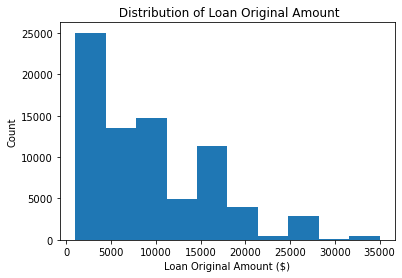

In [34]:
#histogram plot to show distribution of LoanOriginalAmount.
plt.hist(data=pld, x='LoanOriginalAmount')
plt.title(' Distribution of Loan Original Amount')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Count')
plt.show()

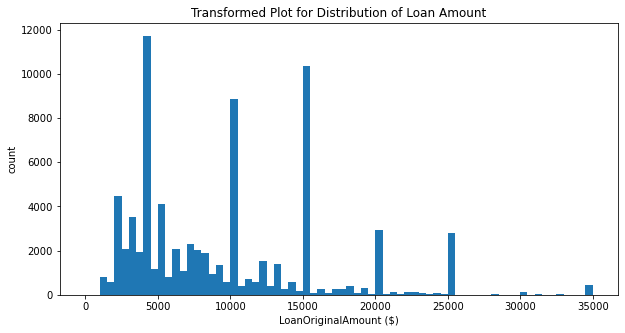

In [35]:
#transformation plot for deeper depiction of distribution
binsize = 500
bins = np.arange(0, pld['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[10,5])
plt.hist(data=pld, x='LoanOriginalAmount', bins=bins)
plt.xlabel('LoanOriginalAmount ($)')
plt.ylabel('count')
plt.title('Transformed Plot for Distribution of Loan Amount');
plt.show()

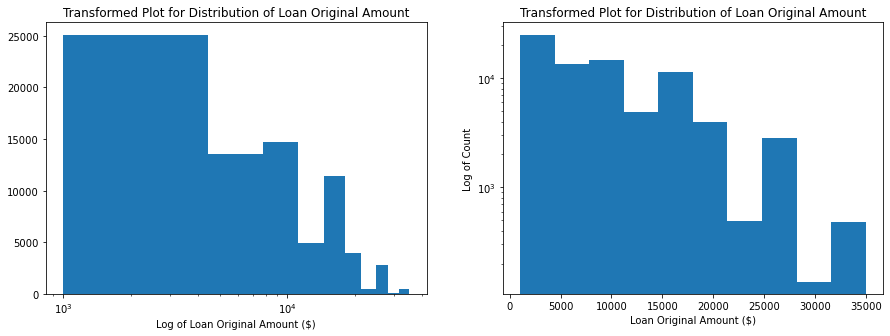

In [36]:
# plotting with a standard-scaled plot
plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1)
plt.hist(data=pld, x='LoanOriginalAmount')
plt.xlabel('Log of Loan Original Amount ($)')
plt.title('Transformed Plot for Distribution of Loan Original Amount')
plt.xscale('log')

plt.subplot(1, 2, 2)
plt.hist(data=pld, x='LoanOriginalAmount')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Log of Count')
plt.title('Transformed Plot for Distribution of Loan Original Amount')
plt.yscale('log')
plt.show()

#### Observation

The distribution of LoanOriginalAmount is multimodal and indicates more loans were collected at amounts between 1,000 - 10,000 (dollars). Transformations performed revealed the peak values being around 5,000, 10,000, 15,000, 20,000, 25,000 and 35,000 (dollars). This means that loans are mostly given out in round figures and in multiples of 5,000. These also revealed that majority of loans are given out at 4,000 , 10,000 and 15,0000 (dollars), so the distribution is Tri-Modal. Y-axis log transformation shows right skewness.

#### Q2. Distribution of LoanStatus?

##### Visualization

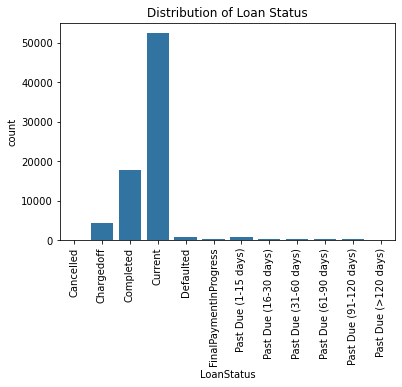

In [37]:
#show distribution of LoanStatus variable.
sb.countplot(data=pld,x='LoanStatus',color = sb.color_palette()[0])
plt.title('Distribution of Loan Status')
plt.xticks(rotation=90);

In [38]:
def barplot(data, colname):
    pld=data
    col_name=colname
    
    type_counts = pld[col_name].value_counts()
    order = type_counts.sort_values()
    n_total = type_counts.sum()
    color = sb.color_palette()[0]
    plt.figure(figsize = (15, 5))
    f = sb.countplot(data=pld, y=col_name, order=order, color=color);
    try:
        for index in range(type_counts.shape[0]):
            count = type_counts[index]
            percent_str = f'{100 * count / n_total:0.2f}%'
            plt.text(x=count+3, y=index, s=percent_str, va='center', fontdict={'fontsize': 15});

        xticks = list(type_counts.values)[::-1]
        #print(xticks)
        xlabels = [f'{elt:0.1f}' for elt in xticks]
        yticks = list(type_counts.index)
        #print(yticks)
        ylabels = [f'{elt}' for elt in yticks]
        #plt.xticks(ticks=xticks, labels=xlabels, rotation=30)
        plt.yticks(ticks=np.arange(len(yticks)), labels=ylabels, rotation=60)
    except Exception as e :
        #print(e)
        pass     

#### Observation

The distribution plot shows that more than 50,000 borrowers currently have a loan with Prosper, near 20,000 have completed their loan payments, and the next highests are Chargedoff, Past due(1-15 days), and Defaulted respectively.

#### Q3: Distribution of IncomeRange

##### Visualization

C:\Users\Uwakmfon\anaconda3\envs\my_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


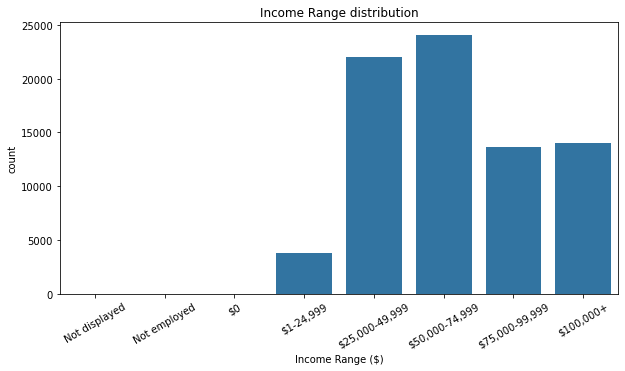

In [39]:
plt.figure(figsize=[10, 5])
sb.countplot(pld.IncomeRange, color=sb.color_palette()[0]);
plt.title('Income Range distribution');
plt.xlabel('Income Range ($)');
plt.xticks(rotation=30);

#### Observation
 Borrowers with income range between 25,000 - 75,000 ($) get the most loan amount.

#### Q4: ListingCategory Distribution

##### Visualization

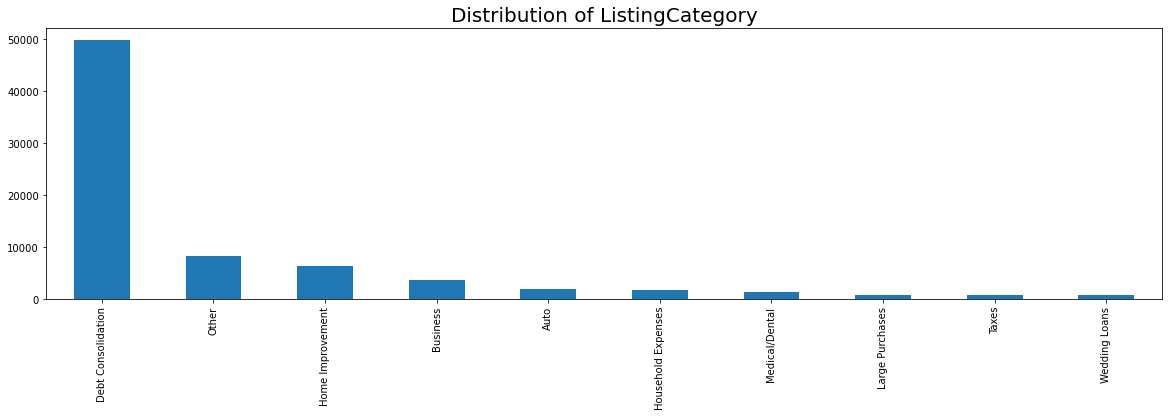

In [42]:
#Distribution
pld['ListingCategory'].value_counts().head(10).plot(kind='bar',figsize=(20,5));
plt.title('Distribution of ListingCategory', fontdict={'fontsize': 20});

#### Observation

Majority of borrowers selected Debt Consolidation listing category when posting their listing. This was followed by Other and Home Improvement. 

#### Q5: Distribution of IsBorrowerHomeOwner and EmploymentStatus

##### Visualization

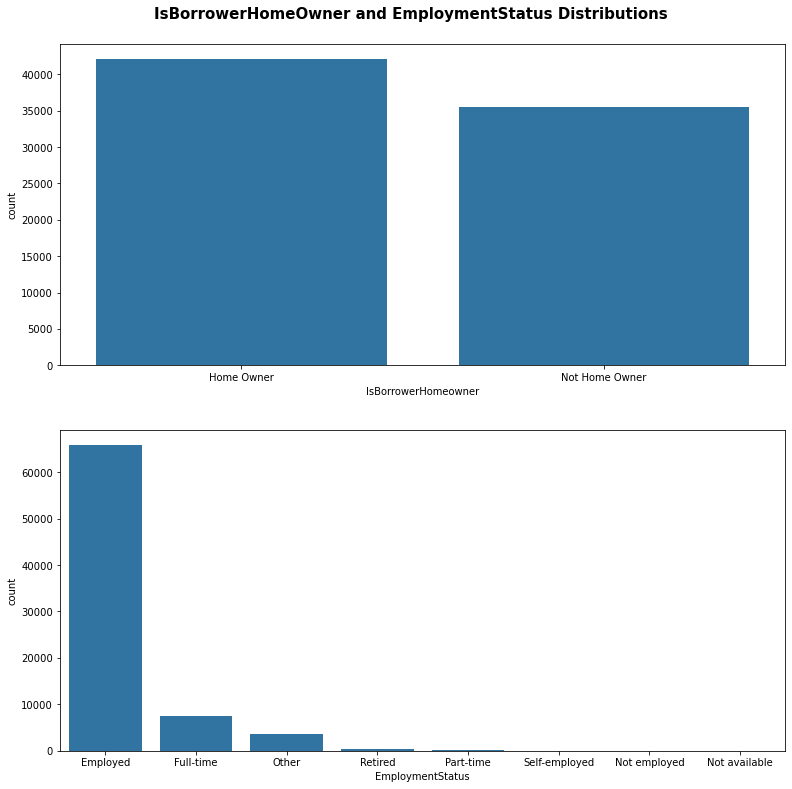

In [42]:
#distribution plots.
fig, ax = plt.subplots(nrows=2, figsize = [13,13])
base_color=sb.color_palette()[0]
plt.suptitle('IsBorrowerHomeOwner and EmploymentStatus Distributions', fontsize=15, fontweight='bold', x=0.5, y=0.92)
sb.countplot(data=pld, x='IsBorrowerHomeowner', order=pld['IsBorrowerHomeowner'].value_counts().index, 
             color=base_color, ax = ax[0])
sb.countplot(data=pld, x='EmploymentStatus', order=pld['EmploymentStatus'].value_counts().index,
             color=base_color, ax = ax[1]);
plt.show()

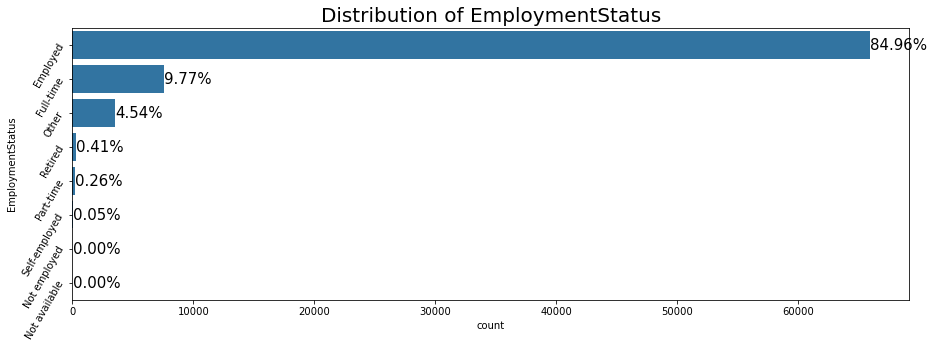

In [43]:
barplot(data=pld, colname='EmploymentStatus');
plt.title('Distribution of EmploymentStatus', fontdict={'fontsize': 20});

#### Observation
Majority of borrowers are Employed and Full-time. Borrowers are more Home Owners than not Home Owners.

#### Q6: Distribution of Occupation and EmploymentStatusDuration

##### Visualization

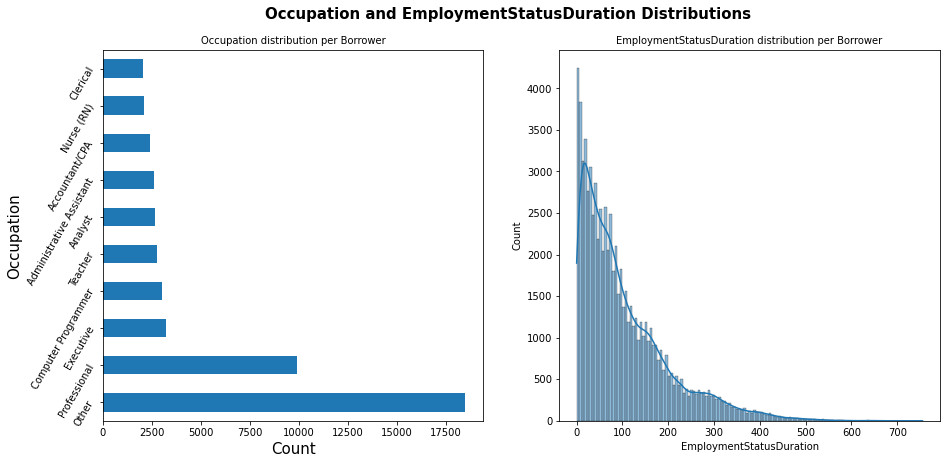

In [44]:
#distribution plots
plt.figure(figsize = (15, 15));
plt.suptitle('Occupation and EmploymentStatusDuration Distributions', fontsize=15, fontweight='bold', x=0.5, y=0.92)


plt.subplot(2, 2, 1)
pld['Occupation'].value_counts().nlargest(10).plot(kind='barh');
plt.title('Occupation distribution per Borrower', fontdict={'fontsize': 10});
plt.xlabel(xlabel='Count', fontdict={'fontsize': 15});
plt.ylabel(ylabel='Occupation', fontdict={'fontsize': 15});
plt.yticks(rotation=60);

plt.subplot(2, 2, 2)
sb.histplot(data=pld, x='EmploymentStatusDuration', kde=True);
plt.title('EmploymentStatusDuration distribution per Borrower', fontdict={'fontsize': 10});

#### Observation
Majority of borrowers do not specify their occupations. Near 10000 borrowers are Professionals, followed by Executives and Computer Programmers. Most borrowers have been employed between 0 - 100 months, which reveals that it is individuals who have worked for shorter amounts of time that tend or are more likely to take loans

#### Q7: ProsperScore Distribution

##### Visualization

C:\Users\Uwakmfon\anaconda3\envs\my_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


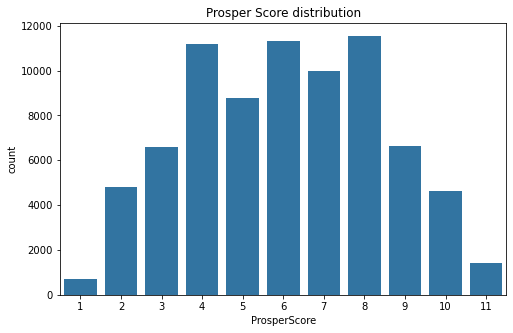

In [45]:
plt.figure(figsize=[8, 5])
sb.countplot(pld.ProsperScore, color=sb.color_palette()[0]);
plt.title('Prosper Score distribution');

#### Observation
Prosper score which is a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. It measures the amount of risk level a lender should expect if the loan is approved. The distribution plot shows risk levels for loan is roughly trimodal at 4, 6, 8 risk levels.

#### Q8: MonthlyLoanPayment Distribution

##### Visualization

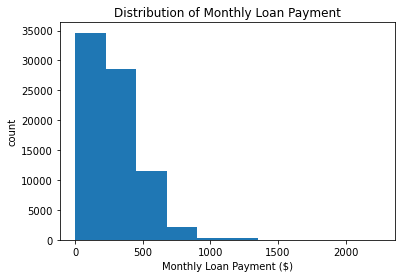

In [46]:
#distribution plot 
plt.hist(data=pld, x='MonthlyLoanPayment');
plt.xlabel('Monthly Loan Payment ($)');
plt.ylabel('count');
plt.title('Distribution of Monthly Loan Payment');

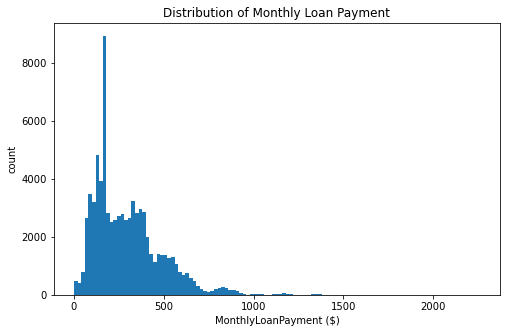

In [47]:
#plot with a standard-scaled plot
binsize = 20
bins=np.arange(0, pld['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=pld, x='MonthlyLoanPayment', bins=bins);
plt.xlabel('MonthlyLoanPayment ($)');
plt.ylabel('count');
plt.title('Distribution of Monthly Loan Payment');
plt.show()

#### Observation 

The distribution is unimodal with majority of the monthly loan payment being below 500 dollars. The payments from 500 dollars and above I suspect should be made by high-earning borrowers.

## Bivariate Exploration

> In this section, I'll investigate relationships between pairs of variables that have been introduced in some
fashion in the previous section (univariate exploration).

####  Q9: Which occupations are likely to receive high loan amounts? (Relationship between LoanOriginalAmount and Occupation)

##### Visualization

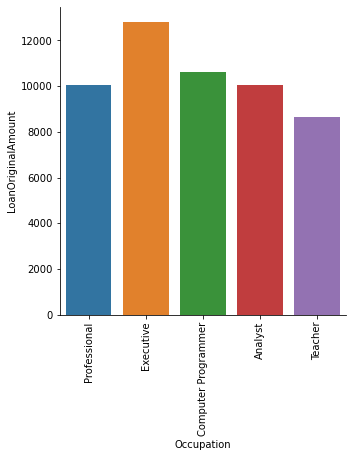

In [48]:
plot_order = pld.groupby('Occupation')['LoanOriginalAmount'].sum().sort_values(ascending=False).index.values
sb.catplot(data=pld, x='Occupation', y='LoanOriginalAmount', kind='bar', ci=None, legend_out=False, order=plot_order[1:6])
plt.xticks(rotation=90);

#### Observation

The occupations with the highest loan amounts are Executives, Computer Programmers, Analyst, Professionals and Teachers. These occupations are reputable and high-paying, so it is suspected that high income and occupation have an effect on loan amount given.

#### Q10: Does Loan Amount taken influence Loan Status (Relationship between LoanOriginalAmount and LoanStatus)

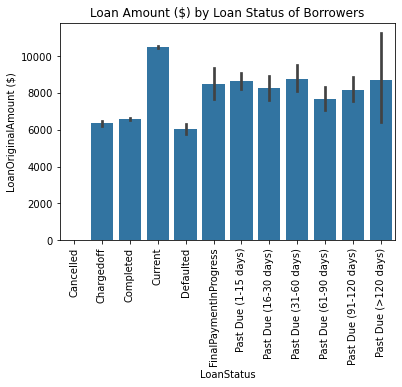

In [49]:
sb.barplot(data=pld, x='LoanStatus', y='LoanOriginalAmount', color=sb.color_palette()[0])
plt.xticks(rotation=15);
plt.ylabel('LoanOriginalAmount ($)')
plt.title('Loan Amount ($) by Loan Status of Borrowers')
plt.xticks(rotation=90);

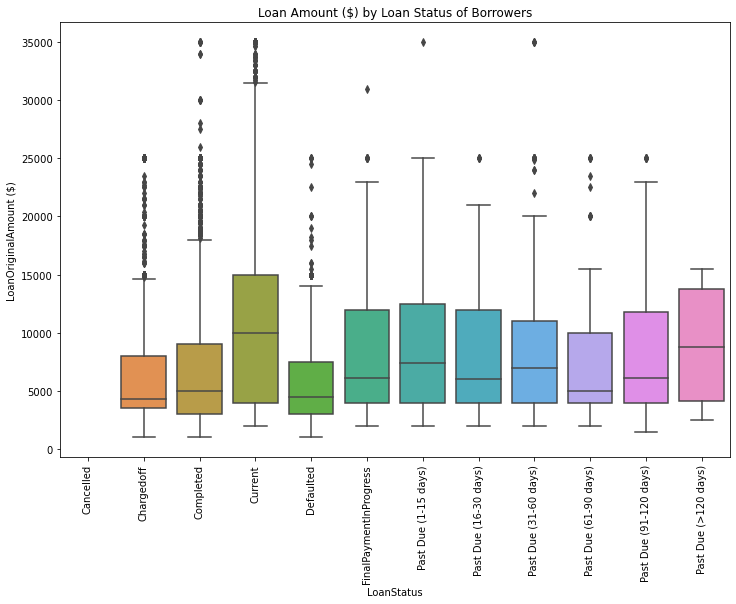

In [50]:
plt.figure(figsize=[12,8])

sb.boxplot(data=pld,x='LoanStatus', y='LoanOriginalAmount')
plt.xticks(rotation=15)
plt.ylabel('LoanOriginalAmount ($)')
plt.title('Loan Amount ($) by Loan Status of Borrowers')
plt.xticks(rotation=90);

#### Observation
The plot reveals that borrowers with current loans have the highest amount of loans. Majority of borrowers with past due(>120 days) payments took relatively higher amounts of loans, this could be a factor in why they're not timely with payment. Charged off, completed and defaulted borrowers took loan amount near the same range.

#### Q11: How does ProsperScore affect Loan Amount received by borrower? (Relationship between ProsperScore and LoanOriginalAmount)

##### Visualization

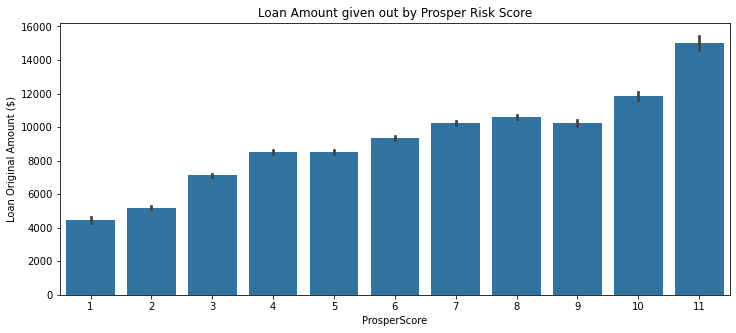

In [51]:
plt.figure(figsize=[12,5])
sb.barplot(data=pld, x='ProsperScore', y='LoanOriginalAmount', color=sb.color_palette()[0])
plt.ylabel('Loan Original Amount ($)');
plt.title('Loan Amount given out by Prosper Risk Score');

#### Observation
The Prosper score ranges from 1-10, with 10 being the best, or lowest risk score. The bar plot above shows that as the Prosper Score increases towards the best or lowest risk score, the loan amount increases too. This means the higher the prosper score, the higher the amount of loan amount received. This suggests that borrowers with low risk scores are more likely to get larger loan amounts.

#### Q12: Will being a HomeOwner affect the Loan Original Amount received? (Relationship between Loan original amount and IsBorrowerHomeowner)

##### Visualization

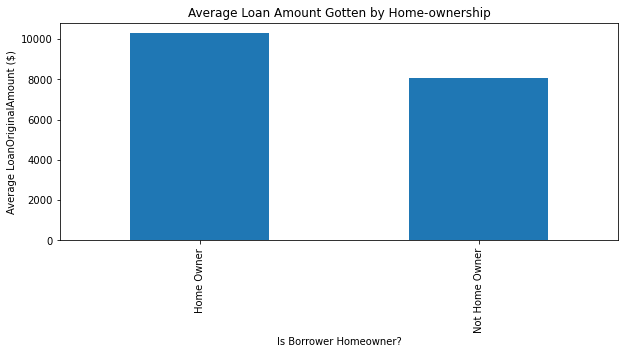

In [52]:
#Plot average Loan Amount by Home-ownership
data=pld.groupby('IsBorrowerHomeowner').mean()['LoanOriginalAmount']
#Create a plot as the variable "ax"
ax = data.plot(kind='bar',
               title="Average Loan Amount Gotten by Home-ownership",
               figsize = (10,4), color=base_color)
#Set axis labels for the "ax" plot
ax.set(xlabel='Is Borrower Homeowner?',
       ylabel='Average LoanOriginalAmount ($)');

#### Observation
Being a homeowner definitely affects the original loan amount received as a borrower because the plot reveals that Homeowners have higher average loan original amount compared to none home-owners. 

#### Q13: Does Prosper Score influence the interest rate given to the borrower? (Relationship between ProsperScore andBorrowerRate)

##### Visualization

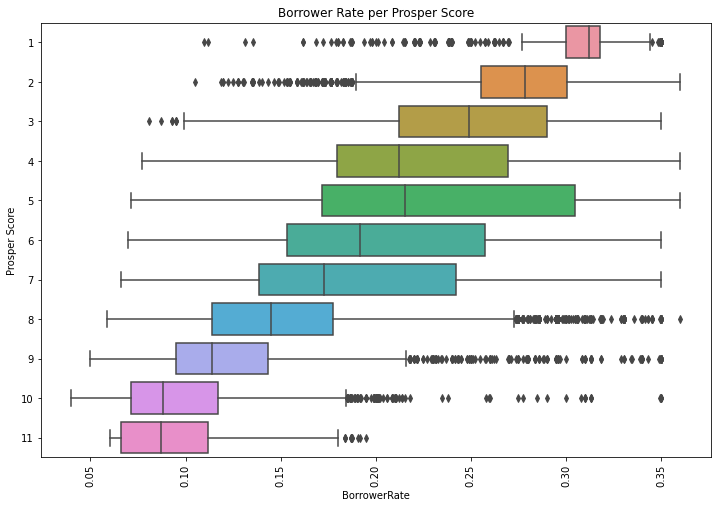

In [53]:
plt.figure(figsize=[12,8])

sb.boxplot(data=pld,x='BorrowerRate', y='ProsperScore')
plt.xticks(rotation=15)
plt.ylabel('Prosper Score')
plt.title('Borrower Rate per Prosper Score')
plt.xticks(rotation=90);

#### Observation
The plot reveals that the higher the Prosper Score, the lower the borrower's interest rates. Prosper score clearly has an influence on interest rate given to the borrower.

#### Q14: Does employment status affect the amount of original loan received by borrower? (Relationship between Employment status and Loan Original Amount)

##### Visualization

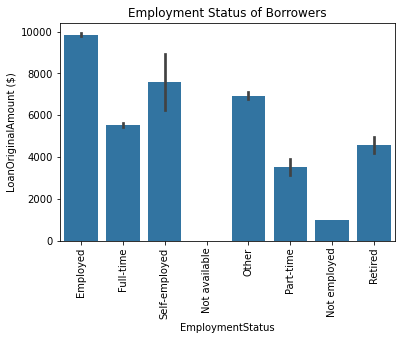

In [54]:
sb.barplot(data=pld, x='EmploymentStatus', y='LoanOriginalAmount', color=sb.color_palette()[0])
plt.xticks(rotation=15);
plt.ylabel('LoanOriginalAmount ($)')
plt.title('Employment Status of Borrowers')
plt.xticks(rotation=90);

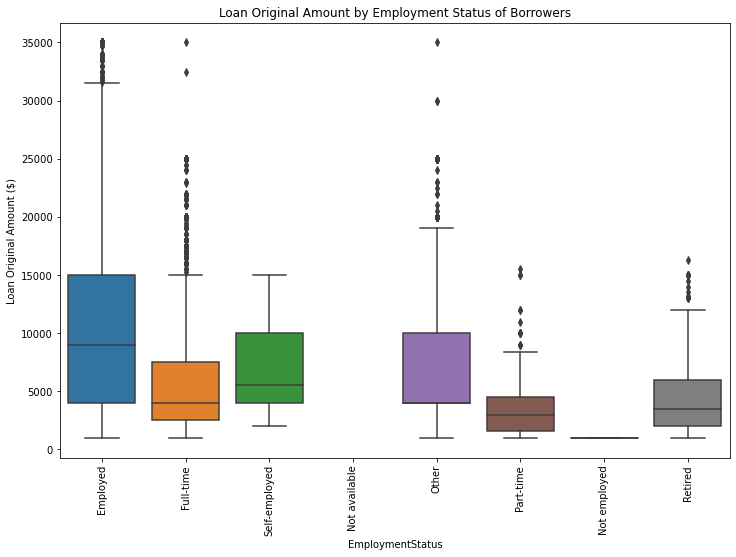

In [55]:
plt.figure(figsize=[12,8])

sb.boxplot(data=pld,x='EmploymentStatus', y='LoanOriginalAmount')
plt.xticks(rotation=15)
plt.ylabel('Loan Original Amount ($)')
plt.title('Loan Original Amount by Employment Status of Borrowers')
plt.xticks(rotation=90);

#### Observation
The plots reveal that employed borrowers receive the highest loan amounts from Prosper. 

### Relationships I observed in this part of the investigation. 

> Employed borrowers receive higher loan amounts from Prosper compared to not employed borrowers.

> Homeowners are seen to receive higher loan amounts when compared to borrowers who are not homeowners.

> The relationship between Loan original amount and prosper score revealed that borrowers who received higher amounts of loan had higher prosper scores and were therefore low risk.

### Interesting relationships between the other features (not the main feature(s) of interest)?

> I observed an interesting relationship between Prosper Score and Borrower's rate. The prosper score of a borrower affects the interest rate that borrower would get on a loan. The higher the Prosper Score with 10 being the best, or lowest risk score, the lower the borrower's interest rates.

## Multivariate Exploration

> In this section, I'll create plots of three or more variables to investigate my data even
further.

#### Q15 How does employment status and being a Homeowner affect the Loan Original Amount? (Relationship between EmploymentStatus, LoanOriginalAmount and IsBorroweraHomeOwner)

##### Visualization

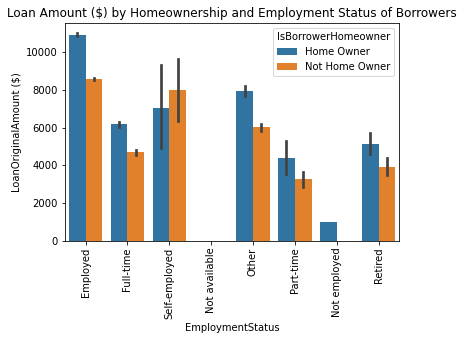

In [56]:
sb.barplot(data=pld, x='EmploymentStatus', y='LoanOriginalAmount', hue='IsBorrowerHomeowner')
plt.xticks(rotation=15);
plt.ylabel('LoanOriginalAmount ($)')
plt.title('Loan Amount ($) by Homeownership and Employment Status of Borrowers')
plt.xticks(rotation=90);

#### Observation
From the plot, it can be seen that borrowers who are homeowners receive higher amount of loans compared to borrowers who are not homeowners. However, it is interesting to notice that borrowers who are homeowners and not employed still receive loan amounts, even though small. Borrowers who are not homeowners and also not employed, do not receive any loans. 

#### Q16: How does  Loan Term and Prosper score affect the Loan Amount? (Relationship between LoanTerm, ProsperScore, and LoanOriginalAmount) 

##### Visualization

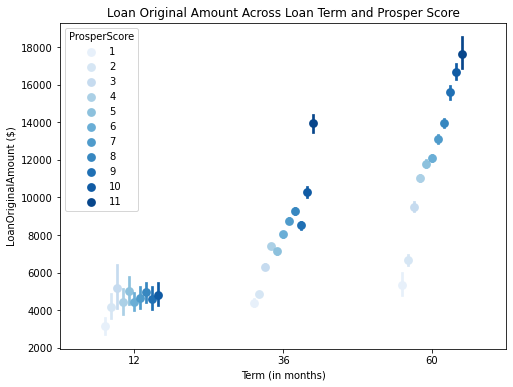

In [57]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data=pld, x = 'Term', y = 'LoanOriginalAmount', hue = 'ProsperScore',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount Across Loan Term and Prosper Score')
plt.ylabel('LoanOriginalAmount ($)')
plt.xlabel('Term (in months)')
plt.show();

#### Observation
The plot reveals that higher Loan Term(in months) and a high Prosper score (less risk) say 10 or 11, will result in a borrower being more likely to get a high loan amount.


#### Q18: Relationship between ProsperScore, BorrowerRate, and ProsperRating?

##### Visualization.

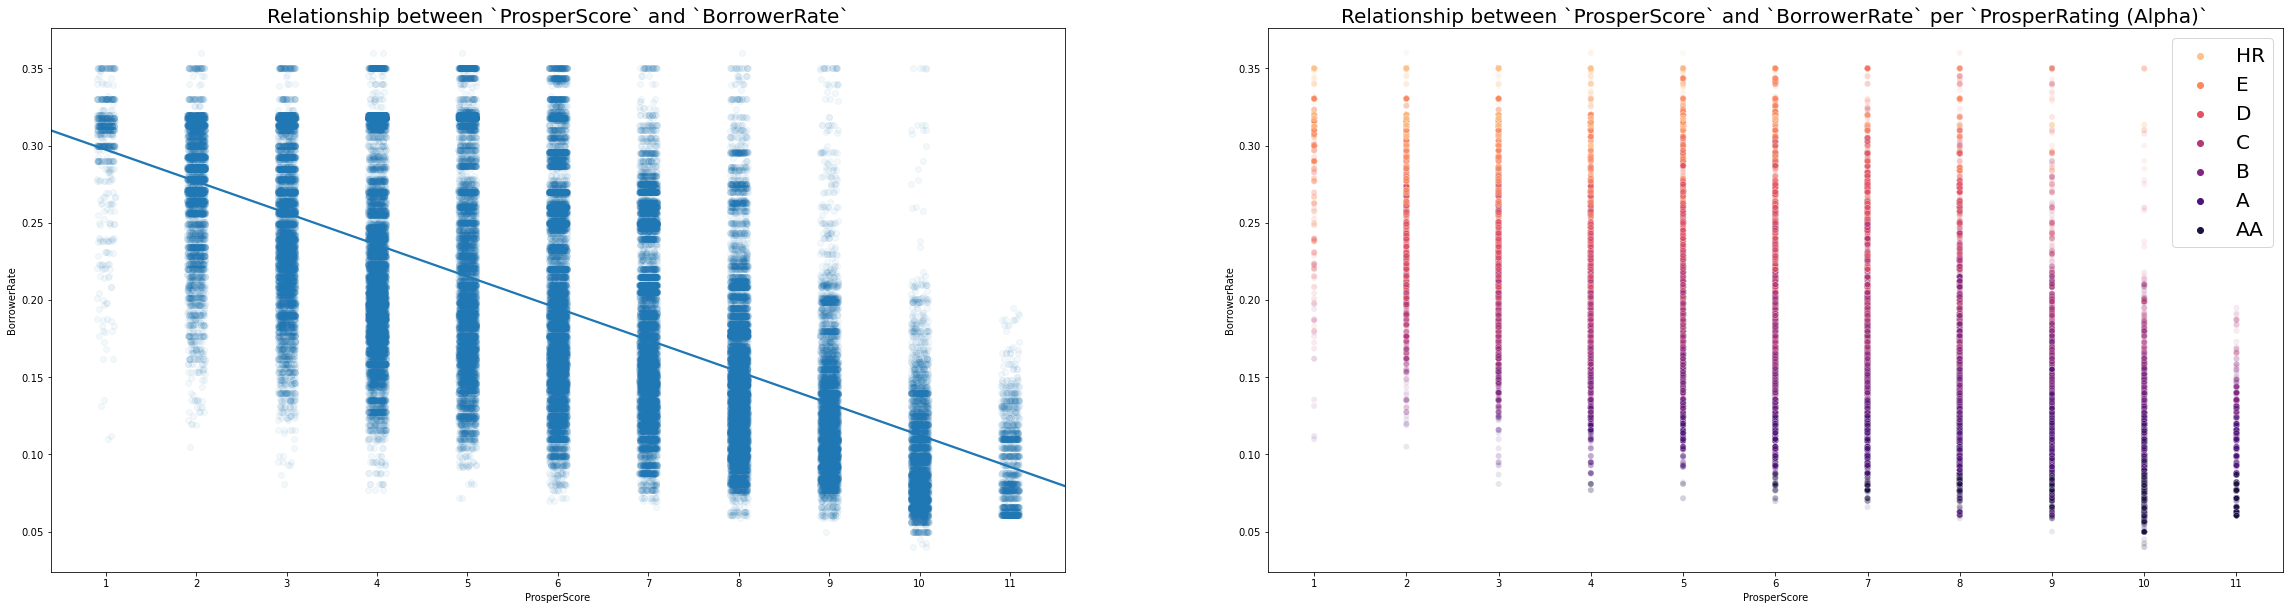

In [58]:
pld["ProsperScore"] = pld["ProsperScore"].astype("int")
color = sb.color_palette()[0]
plt.figure(figsize = (40, 10));

plt.subplot(1, 2, 1)
sb.regplot(data=pld, x='ProsperScore', y='BorrowerRate', truncate=False, x_jitter=0.1, scatter_kws={'alpha': 1/20});
plt.xticks(ticks=range(1, 11 + 1), labels=[f'{i}' for i in range(1, 11 + 1)])
plt.title('Relationship between `ProsperScore` and `BorrowerRate`', fontdict={'fontsize': 20});

plt.subplot(1, 2, 2)
sb.scatterplot(data=pld, x='ProsperScore', y='BorrowerRate', hue='ProsperRating (Alpha)', x_jitter=0.3, palette='magma_r', alpha=1/10);
plt.xticks(ticks=range(1, 11 + 1), labels=[f'{i}' for i in range(1, 11 + 1)])
plt.legend(fontsize=20, loc='upper right');
plt.title('Relationship between `ProsperScore` and `BorrowerRate` per `ProsperRating (Alpha)`', fontdict={'fontsize': 20});

#### Observation

As the ProsperScore increases, the BorrowerRate decreases. There is a negative correlation between these variables.

With every prosper score value, as ProsperRating decreases towards HR or E or D for example, BorrowerRate increases

Better ProsperRating (A or AA) is associated with lower BorrowerRate and higher ProsperScore.

### Some of the relationships I observed in this part of the investigation include:

> The relationship between EmploymentStatus, LoanOriginalAmount and IsBorroweraHomeOwner revealed that borrowers who are homeowners and not employed still receive loan amounts, even though small. However, borrowers who are not homeowners and also not employed, do not receive any loans.

> After examining the relationship between LoanTerm, ProsperScore, and LoanOriginalAmount, I observed that Loan Term influences  the amount of loan to be given out. The loan amount given to borrowers is also influenced by the Prosper score (risk score). That is because the higher the Loan Term, and the higher the risk score(Prosper Score), the larger the Loan Amount to be given to borrowers. 

> Better ProsperRating (A or AA) is associated with lower BorrowerRate and higher ProsperScore.

## Conclusions

> From the exploration of this dataset, I was able to derive valuable information regarding different factors which influences the Loan Original Amount received by borrowers.

> Observations revealed that borrowers who are homeowners, whether employed or not employed receive higher loan amounts from Prosper Loans compared to borrowers who are not homeowners. 

> Borrowers who received higher amounts of loan also had higher prosper scores which indicates low risk and is also another deciding factor of the loan original amount received by a borrower. 

> Most borrowers have been employed between 0 - 100 months, which reveals that it is individuals who have worked for shorter amounts of time that tend or are more likely to take loans

> The occupations that received the highest loan amounts are reputable and high-paying, so high income and occupation type also have influence on loan amount received by a borrower.

 Income range plays a role in loan amount received from Prosper as borrowers with income range between 25,000 - 75,000 ($) get the most loan amount.

Majority of borrowers with past due(>120 days) payments took relatively higher amounts of loans. These huge loan amounts are most likely a factor in why borrowers affected are not timely with payment.

#### Limitations
> Not all variables of this dataset were analyzed.